('Plant Species: Artemisia californica', 'Health Score: 96/100')

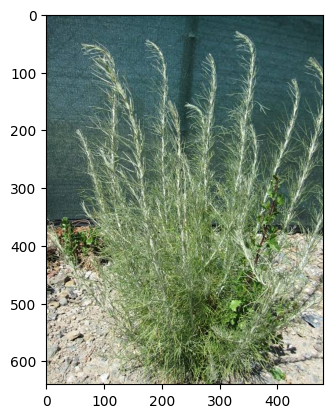

In [32]:
import requests
import json
import base64

# Function to convert image to base64
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')
        
API_KEY = ''
image = 'example_images/sagebush1.jpeg'
plant_id_url = 'https://plant.id/api/v3/identification'
plant_health_url = 'https://plant.id/api/v3/health_assessment'

# Define the API endpoint and headers
headers = {
    'Api-Key': API_KEY,
    'Content-Type': 'application/json',
}

# Convert your image to base64
image_base64 = image_to_base64(image)

# Define the payload
payload = {
    "images": [image_base64],
    "latitude": 34.106241592122885,
    "longitude": -117.70836415363551,
    "similar_images": True
}

# Send the POST request
id_response = requests.post(plant_id_url, headers=headers, json=payload)
health_response = requests.post(plant_health_url, headers=headers, json=payload)

results = json.loads(id_response.text)
health_results = json.loads(response.text)

import matplotlib.pyplot as plt
from PIL import Image

img = Image.open(image)
plt.imshow(img)
"Plant Species: "+results['result']['classification']['suggestions'][0]['name'], "Health Score: " + str(int(health_results['result']['is_healthy']['probability']*100))+"/100"
